In [1]:
import pandas as pd
import numpy as np

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from sklearn.preprocessing import LabelEncoder


In [2]:
from keras.models import Sequential
from keras.layers import Dense
from scikeras.wrappers import KerasClassifier, KerasRegressor
from keras.utils import np_utils


In [3]:
random_seed = 7
np.random.seed(random_seed)

In [4]:
filename = 'D:\Downloads\Iris.csv'
df = pd.read_csv(filename)

In [5]:
print (df.isnull().sum())

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


In [6]:
print (df.shape)

(150, 6)


In [7]:
print(df.dtypes)


Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object


In [8]:
print(df.head(5))

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [9]:
print(df.describe(include=None))

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [10]:
print(df.groupby('Species').size())

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


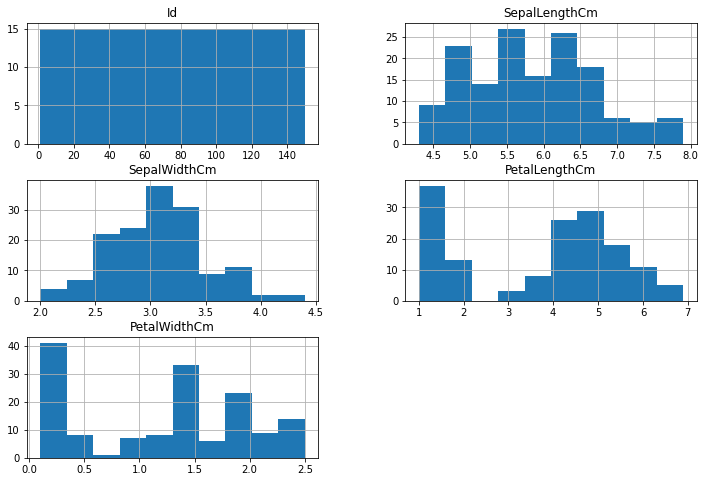

In [11]:
df.hist(figsize=(12,8))
plt.show()

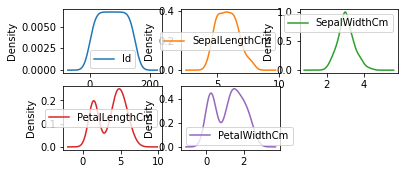

In [12]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True,)
plt.show()

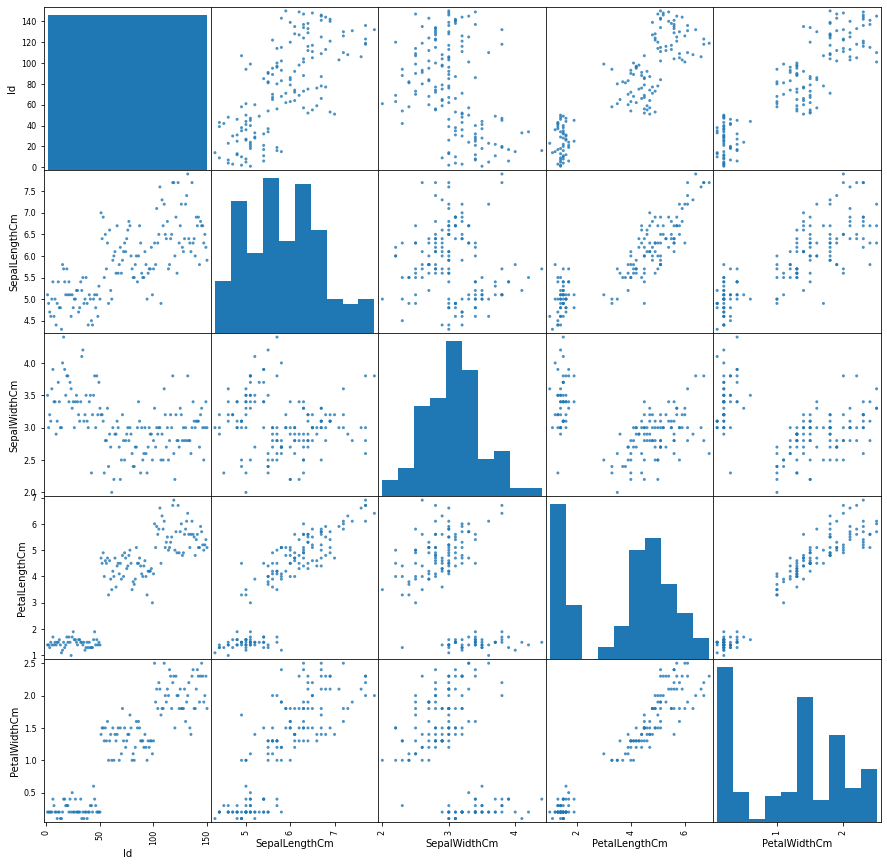

In [13]:
scatter_matrix(df, alpha=0.8, figsize= (15,15))
plt.show()

In [14]:
array = df.values

X = array [:,1:5]
Y = array[:,5]

In [15]:
test_size = 0.33
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=test_size,random_state=random_seed)

In [16]:
encoder_train = LabelEncoder()
encoder_train.fit(Y_train)
encoded_Y_train = encoder_train.transform(Y_train)

onehot_Y_train = np_utils.to_categorical(encoded_Y_train)

encoder_test = LabelEncoder()
encoder_test.fit(Y_test)
encoded_Y_test = encoder_test.transform(Y_test)



onehot_Y_test = np_utils.to_categorical(encoded_Y_test)

In [17]:
def baseline_model():
        model = Sequential()
        model.add(Dense(8, input_dim=4, activation='relu'))
        model.add(Dense(3, activation='softmax'))
        
        model.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                     metrics=['accuracy'])
        return model

In [18]:
model = baseline_model()

In [20]:
# Convert float values to integer values
X_train = X_train.astype(int)
onehot_Y_train = onehot_Y_train.astype(int)

# Ensure label data is in integer format
encoded_Y_train = encoded_Y_train.astype(int)

model.fit(X_train, onehot_Y_train, epochs=150, batch_size=10)

Epoch 1/150
10/10 [==============================] - 1s 2ms/step - loss: 0.9388 - accuracy: 0.3400
Epoch 2/150
10/10 [==============================] - 0s 2ms/step - loss: 0.9110 - accuracy: 0.3700
Epoch 3/150
10/10 [==============================] - 0s 2ms/step - loss: 0.8832 - accuracy: 0.3900
Epoch 4/150
10/10 [==============================] - 0s 2ms/step - loss: 0.8574 - accuracy: 0.4000
Epoch 5/150
10/10 [==============================] - 0s 3ms/step - loss: 0.8293 - accuracy: 0.5200
Epoch 6/150
10/10 [==============================] - 0s 2ms/step - loss: 0.8021 - accuracy: 0.5400
Epoch 7/150
10/10 [==============================] - 0s 2ms/step - loss: 0.7765 - accuracy: 0.6100
Epoch 8/150
10/10 [==============================] - 0s 2ms/step - loss: 0.7527 - accuracy: 0.8000
Epoch 9/150
10/10 [==============================] - 0s 2ms/step - loss: 0.7316 - accuracy: 0.8100
Epoch 10/150
10/10 [==============================] - 0s 2ms/step - loss: 0.7122 - accuracy: 0.8200
Epoch 11/

10/10 [==============================] - 0s 2ms/step - loss: 0.3036 - accuracy: 0.9500
Epoch 84/150
10/10 [==============================] - 0s 3ms/step - loss: 0.3014 - accuracy: 0.9300
Epoch 85/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.9300
Epoch 86/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2979 - accuracy: 0.9700
Epoch 87/150
10/10 [==============================] - 0s 3ms/step - loss: 0.2959 - accuracy: 0.9700
Epoch 88/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2947 - accuracy: 0.9700
Epoch 89/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2930 - accuracy: 0.9700
Epoch 90/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.9200
Epoch 91/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2888 - accuracy: 0.9300
Epoch 92/150
10/10 [==============================] - 0s 2ms/step - loss: 0.2881 - accuracy: 0.9700
Epoch 93/150


In [21]:
evaluator = KerasClassifier(build_fn=baseline_model, epochs=200, batch_size=5)


In [22]:
kfold = KFold(n_splits=10, shuffle=True, random_state=random_seed)

In [23]:
results = cross_val_score(evaluator, X_test, onehot_Y_test, cv=kfold)


print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200


C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 0s 2ms/step - loss: 2.1012 - accuracy: 0.3333
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 1.9955 - accuracy: 0.3333
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 1.9077 - accuracy: 0.3333
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 1.8166 - accuracy: 0.3333
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 1.7303 - accuracy: 0.3333
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 1.6530 - accuracy: 0.3333
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 1.5822 - accuracy: 0.3333
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 1.5224 - accuracy: 0.3333
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 1.4567 - accuracy: 0.3333
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 1.4017 - accuracy: 0.3333
Epoch 11/200
9/9 [=======================

9/9 [==============================] - 0s 4ms/step - loss: 0.5902 - accuracy: 0.7556
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5872 - accuracy: 0.7556
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5846 - accuracy: 0.7556
Epoch 87/200
9/9 [==============================] - 0s 0s/step - loss: 0.5822 - accuracy: 0.7556
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5795 - accuracy: 0.7333
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5771 - accuracy: 0.7556
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5748 - accuracy: 0.7556
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5727 - accuracy: 0.7778
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5705 - accuracy: 0.7778
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7556
Epoch 94/200
9/9 [================

9/9 [==============================] - 0s 2ms/step - loss: 0.4841 - accuracy: 0.8000
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4836 - accuracy: 0.8000
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4831 - accuracy: 0.8000
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7556
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4822 - accuracy: 0.7778
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4814 - accuracy: 0.7556
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4808 - accuracy: 0.7556
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7778
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.8000
Epoch 176/200
9/9 [==============================] - 0s 4ms/step - loss: 0.4794 - accuracy: 0.7778
Epoch 177/200
9/9 [=====

C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 0s 2ms/step - loss: 2.5502 - accuracy: 0.4000
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 2.3246 - accuracy: 0.4000
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 2.1121 - accuracy: 0.4000
Epoch 4/200
9/9 [==============================] - 0s 4ms/step - loss: 1.8922 - accuracy: 0.4000
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 1.7065 - accuracy: 0.4000
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 1.5328 - accuracy: 0.4000
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 1.3881 - accuracy: 0.4000
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 1.2904 - accuracy: 0.4222
Epoch 9/200
9/9 [==============================] - 0s 4ms/step - loss: 1.2166 - accuracy: 0.4667
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1623 - accuracy: 0.4889
Epoch 11/200
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.8667
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4150 - accuracy: 0.8889
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.8889
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4086 - accuracy: 0.8889
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4068 - accuracy: 0.8889
Epoch 89/200
9/9 [==============================] - 0s 0s/step - loss: 0.4030 - accuracy: 0.8889
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4009 - accuracy: 0.8889
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3985 - accuracy: 0.8667
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.8667
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3917 - accuracy: 0.8667
Epoch 94/200
9/9 [================

9/9 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.9556
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.9556
Epoch 169/200
9/9 [==============================] - 0s 0s/step - loss: 0.2652 - accuracy: 0.9556
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.9556
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2641 - accuracy: 0.9556
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2628 - accuracy: 0.9333
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2595 - accuracy: 0.9556
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2577 - accuracy: 0.9556
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2587 - accuracy: 0.9556
Epoch 176/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2575 - accuracy: 0.9556
Epoch 177/200
9/9 [======

C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 1s 2ms/step - loss: 0.9778 - accuracy: 0.6444
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9360 - accuracy: 0.6444
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9035 - accuracy: 0.6444
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8713 - accuracy: 0.6444
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8494 - accuracy: 0.6444
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8302 - accuracy: 0.6444
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8116 - accuracy: 0.6444
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7984 - accuracy: 0.6444
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7880 - accuracy: 0.6667
Epoch 10/200
9/9 [==============================] - 0s 0s/step - loss: 0.7750 - accuracy: 0.6667
Epoch 11/200
9/9 [========================

9/9 [==============================] - 0s 2ms/step - loss: 0.4369 - accuracy: 0.9333
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4347 - accuracy: 0.9333
Epoch 86/200
9/9 [==============================] - 0s 0s/step - loss: 0.4326 - accuracy: 0.9556
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.9556
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.9556
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.9556
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4259 - accuracy: 0.9111
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4228 - accuracy: 0.9556
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4204 - accuracy: 0.9556
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.9556
Epoch 94/200
9/9 [================

9/9 [==============================] - 0s 2ms/step - loss: 0.2889 - accuracy: 0.9778
Epoch 168/200
9/9 [==============================] - 0s 0s/step - loss: 0.2875 - accuracy: 0.9778
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.9778
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2846 - accuracy: 0.9778
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2830 - accuracy: 0.9778
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2819 - accuracy: 0.9778
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2805 - accuracy: 0.9778
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2794 - accuracy: 0.9778
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2774 - accuracy: 0.9778
Epoch 176/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2761 - accuracy: 0.9778
Epoch 177/200
9/9 [======

C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 1s 2ms/step - loss: 0.9644 - accuracy: 0.3778
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8554 - accuracy: 0.4000
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7748 - accuracy: 0.5333
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7238 - accuracy: 0.6000
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7105 - accuracy: 0.6000
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.6222
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6735 - accuracy: 0.6222
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6595 - accuracy: 0.6000
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6498 - accuracy: 0.6000
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6360 - accuracy: 0.6000
Epoch 11/200
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 0.3214 - accuracy: 0.9111
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.9111
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3163 - accuracy: 0.9111
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3154 - accuracy: 0.9111
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3128 - accuracy: 0.9333
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.9333
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3123 - accuracy: 0.9111
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3075 - accuracy: 0.9111
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3061 - accuracy: 0.9111
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3050 - accuracy: 0.9111
Epoch 94/200
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.2162 - accuracy: 0.9333
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2157 - accuracy: 0.9333
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2141 - accuracy: 0.9556
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2158 - accuracy: 0.9556
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9333
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2123 - accuracy: 0.9333
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2122 - accuracy: 0.9333
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2094 - accuracy: 0.9333
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2088 - accuracy: 0.9333
Epoch 176/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9556
Epoch 177/200
9/9 [=====

C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 1s 2ms/step - loss: 1.3027 - accuracy: 0.3778
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 1.2346 - accuracy: 0.3778
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1767 - accuracy: 0.3778
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1342 - accuracy: 0.3778
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1055 - accuracy: 0.3778
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0853 - accuracy: 0.3111
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0763 - accuracy: 0.3333
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0649 - accuracy: 0.4000
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0567 - accuracy: 0.4444
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0516 - accuracy: 0.4222
Epoch 11/200
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 0.5833 - accuracy: 0.9333
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5783 - accuracy: 0.9111
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.9111
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5713 - accuracy: 0.9111
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5664 - accuracy: 0.9333
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5646 - accuracy: 0.9111
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5590 - accuracy: 0.9333
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5552 - accuracy: 0.9333
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.8889
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5486 - accuracy: 0.8889
Epoch 94/200
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.3633 - accuracy: 0.9556
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3615 - accuracy: 0.9556
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3597 - accuracy: 0.9556
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.9556
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.9556
Epoch 172/200
9/9 [==============================] - 0s 0s/step - loss: 0.3558 - accuracy: 0.9556
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.9556
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3524 - accuracy: 0.9556
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3497 - accuracy: 0.9556
Epoch 176/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.9556
Epoch 177/200
9/9 [======

C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 1s 2ms/step - loss: 2.1496 - accuracy: 0.6222
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 1.9673 - accuracy: 0.6222
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 1.8018 - accuracy: 0.6222
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 1.6718 - accuracy: 0.6222
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 1.5274 - accuracy: 0.6222
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 1.4138 - accuracy: 0.6222
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 1.2944 - accuracy: 0.6222
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1888 - accuracy: 0.6222
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1139 - accuracy: 0.6222
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0418 - accuracy: 0.6222
Epoch 11/200
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 0.4311 - accuracy: 0.9111
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4254 - accuracy: 0.9333
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4253 - accuracy: 0.9333
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4190 - accuracy: 0.9333
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4155 - accuracy: 0.9111
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4146 - accuracy: 0.9111
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.9111
Epoch 91/200
9/9 [==============================] - 0s 0s/step - loss: 0.4063 - accuracy: 0.9333
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4015 - accuracy: 0.9333
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3983 - accuracy: 0.9333
Epoch 94/200
9/9 [================

9/9 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 1.0000
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2275 - accuracy: 1.0000
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2254 - accuracy: 1.0000
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2231 - accuracy: 1.0000
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 1.0000
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2203 - accuracy: 1.0000
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2188 - accuracy: 1.0000
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2174 - accuracy: 1.0000
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2200 - accuracy: 0.9778
Epoch 176/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2159 - accuracy: 0.9778
Epoch 177/200
9/9 [=====

C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 1s 2ms/step - loss: 0.9363 - accuracy: 0.3778
Epoch 2/200
9/9 [==============================] - 0s 0s/step - loss: 0.9054 - accuracy: 0.5333
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8789 - accuracy: 0.6444
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8588 - accuracy: 0.6444
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8384 - accuracy: 0.6444
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8214 - accuracy: 0.6444
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8025 - accuracy: 0.6444
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7881 - accuracy: 0.6444
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7715 - accuracy: 0.6444
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.7558 - accuracy: 0.6444
Epoch 11/200
9/9 [========================

9/9 [==============================] - 0s 2ms/step - loss: 0.4267 - accuracy: 0.9111
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4260 - accuracy: 0.9333
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.9111
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4201 - accuracy: 0.9111
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.9111
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4191 - accuracy: 0.9111
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4160 - accuracy: 0.9111
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4133 - accuracy: 0.9111
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4118 - accuracy: 0.9333
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.4110 - accuracy: 0.9333
Epoch 94/200
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.3008 - accuracy: 0.9778
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 1.0000
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2997 - accuracy: 1.0000
Epoch 170/200
9/9 [==============================] - 0s 0s/step - loss: 0.2977 - accuracy: 1.0000
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2955 - accuracy: 1.0000
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2942 - accuracy: 0.9778
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2937 - accuracy: 1.0000
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 1.0000
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2907 - accuracy: 1.0000
Epoch 176/200
9/9 [==============================] - 0s 0s/step - loss: 0.2910 - accuracy: 1.0000
Epoch 177/200
9/9 [=======

C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 0s 2ms/step - loss: 1.6310 - accuracy: 0.3778
Epoch 2/200
9/9 [==============================] - 0s 0s/step - loss: 1.5806 - accuracy: 0.3778
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 1.5361 - accuracy: 0.3778
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 1.4930 - accuracy: 0.3778
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 1.4578 - accuracy: 0.3778
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 1.4181 - accuracy: 0.3556
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 1.3849 - accuracy: 0.3556
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 1.3603 - accuracy: 0.3333
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 1.3297 - accuracy: 0.2667
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 1.3058 - accuracy: 0.2444
Epoch 11/200
9/9 [========================

9/9 [==============================] - 0s 2ms/step - loss: 0.5761 - accuracy: 0.8000
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5731 - accuracy: 0.7778
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5681 - accuracy: 0.8444
Epoch 87/200
9/9 [==============================] - 0s 0s/step - loss: 0.5661 - accuracy: 0.8667
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5635 - accuracy: 0.8222
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5606 - accuracy: 0.8889
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5592 - accuracy: 0.9111
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5532 - accuracy: 0.9333
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5513 - accuracy: 0.9333
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5489 - accuracy: 0.9111
Epoch 94/200
9/9 [================

9/9 [==============================] - 0s 2ms/step - loss: 0.3999 - accuracy: 0.9556
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3978 - accuracy: 0.9556
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3981 - accuracy: 0.9556
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3964 - accuracy: 0.9556
Epoch 171/200
9/9 [==============================] - 0s 1ms/step - loss: 0.3934 - accuracy: 0.9556
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3922 - accuracy: 0.9333
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.9333
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.9333
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.9333
Epoch 176/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3861 - accuracy: 0.9556
Epoch 177/200
9/9 [=====

C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 1s 2ms/step - loss: 1.2569 - accuracy: 0.3333
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1943 - accuracy: 0.3333
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1409 - accuracy: 0.3333
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0925 - accuracy: 0.3333
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0576 - accuracy: 0.3333
Epoch 6/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0225 - accuracy: 0.3333
Epoch 7/200
9/9 [==============================] - 0s 0s/step - loss: 0.9983 - accuracy: 0.3333
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9812 - accuracy: 0.3333
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9670 - accuracy: 0.3333
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9539 - accuracy: 0.3333
Epoch 11/200
9/9 [========================

9/9 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.6667
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6800 - accuracy: 0.6667
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.6667
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6758 - accuracy: 0.6667
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6742 - accuracy: 0.6667
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6725 - accuracy: 0.6667
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6709 - accuracy: 0.6667
Epoch 91/200
9/9 [==============================] - 0s 3ms/step - loss: 0.6700 - accuracy: 0.6889
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6683 - accuracy: 0.6889
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6667
Epoch 94/200
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.5751 - accuracy: 0.7556
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5744 - accuracy: 0.7556
Epoch 169/200
9/9 [==============================] - 0s 0s/step - loss: 0.5733 - accuracy: 0.7556
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5722 - accuracy: 0.7556
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5716 - accuracy: 0.7333
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5704 - accuracy: 0.7556
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5696 - accuracy: 0.7556
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.7333
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5677 - accuracy: 0.7556
Epoch 176/200
9/9 [==============================] - 0s 2ms/step - loss: 0.5676 - accuracy: 0.7556
Epoch 177/200
9/9 [======

C:\Users\anand\anaconda3\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


9/9 [==============================] - 1s 2ms/step - loss: 1.2976 - accuracy: 0.4889
Epoch 2/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1936 - accuracy: 0.5111
Epoch 3/200
9/9 [==============================] - 0s 2ms/step - loss: 1.1135 - accuracy: 0.5111
Epoch 4/200
9/9 [==============================] - 0s 2ms/step - loss: 1.0329 - accuracy: 0.5111
Epoch 5/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9788 - accuracy: 0.5111
Epoch 6/200
9/9 [==============================] - 0s 4ms/step - loss: 0.9363 - accuracy: 0.5111
Epoch 7/200
9/9 [==============================] - 0s 2ms/step - loss: 0.9017 - accuracy: 0.5111
Epoch 8/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8730 - accuracy: 0.5111
Epoch 9/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8533 - accuracy: 0.4667
Epoch 10/200
9/9 [==============================] - 0s 2ms/step - loss: 0.8394 - accuracy: 0.4667
Epoch 11/200
9/9 [=======================

9/9 [==============================] - 0s 2ms/step - loss: 0.3991 - accuracy: 0.9556
Epoch 85/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3963 - accuracy: 0.9556
Epoch 86/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3928 - accuracy: 0.9556
Epoch 87/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.9556
Epoch 88/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3888 - accuracy: 0.9556
Epoch 89/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3878 - accuracy: 0.9556
Epoch 90/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.9556
Epoch 91/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3786 - accuracy: 0.9556
Epoch 92/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3761 - accuracy: 0.9556
Epoch 93/200
9/9 [==============================] - 0s 2ms/step - loss: 0.3731 - accuracy: 0.9556
Epoch 94/200
9/9 [===============

9/9 [==============================] - 0s 2ms/step - loss: 0.2354 - accuracy: 0.9556
Epoch 168/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2348 - accuracy: 0.9556
Epoch 169/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2338 - accuracy: 0.9556
Epoch 170/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2323 - accuracy: 0.9556
Epoch 171/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2316 - accuracy: 0.9556
Epoch 172/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2321 - accuracy: 0.9556
Epoch 173/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2287 - accuracy: 0.9778
Epoch 174/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2270 - accuracy: 0.9556
Epoch 175/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9556
Epoch 176/200
9/9 [==============================] - 0s 2ms/step - loss: 0.2252 - accuracy: 0.9556
Epoch 177/200
9/9 [=====

In [25]:
scores= model.evaluate(X_test, onehot_Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

2/2 [==============================] - 0s 0s/step - loss: 0.3393 - accuracy: 0.9000

accuracy: 90.00%
